Model Evaluation Summary (NO FEATURE ENGG)
------------------------------------------

 Models Accuracies : 
------------------
LogisticRegression(random_state=0)  :  78.392857

 Best Model :  LogisticRegression(random_state=0)
------------

Best Model (Training) Accuracy:  78.392857
-------------------------------

Prediction Accuracy On Test Data :  69.285714
----------------------------------



Summary Table (Feature Coefficients and Odds Ratio) :
-----------------------------------------------------
               Feature Name  Coefficient  Odds_Ratio
1                   Reason1     2.188314    8.920161
3                   Reason3     1.485598    4.417606
4                   Reason4     1.279204    3.593778
14   Transportation Expense     0.614440    1.848621
11                 Children     0.402093    1.494950
9           Body Mass Index     0.251524    1.285984
2                   Reason2     0.246975    1.280147
5                       Day    -0.001367    0.998634
10           

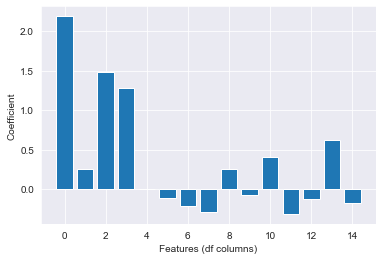

In [143]:
#!/usr/bin/env python3

# This script reads the absenteeism data, builds and tests a logistic ,
# and then makes salary predictions on test data using the best model.'''
   
__author__ = 'adebelen'
__email__ = 'almadebelenece@gmail.com'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.utils import shuffle

# This class creates the train_df and test_df for analysis and modelling 
class DataPrep:
       
    # This method initialises the class variables
    def __init__(self, xtrain_file, xtest_file, ftures_colms, trgt_colm, id_colm): 
        self.ftures_colms = list(ftures_colms)
        self.trgt_colm = trgt_colm
        self.id_colm = id_colm
        self.train_df = self.create_train_df()
        self.test_df = self.create_test_df()
        return 
    
    # This method creates the train_df that is accessible by all other classes  
    # Reads preprocessed file xtrain.csv
    def create_train_df(self): 
        train_df = self.read_file(xtrain_file)
        return train_df
    
    # This method creates the test_df that is accessible by all other classes
    # Reaads preprocessed file (xtest.csv) 
    def create_test_df(self):
        test_df = self.read_file(xtest_file)
        return test_df
    
    # This method reads the give dataset (given is .csv) and save file as dataframe, df
    # reads the preprocessed files
    def read_file(self, file):
        df = pd.read_csv(file)
        return df
    
# This class adds new features
class FeatureEngineering:
    
    # This method initialises the class variables
    def __init__(self, dp):   
        self.dp = dp   
        self.groups = dp.train_df.groupby(dp.ftures_colms[:-2])
        self.dp.train_df = self.create_new_train_df()
        self.dp.test_df = self.create_new_test_df()
        self.dp.ftures_colms = self.update_ftures_colms(self.dp.test_df)
        
    # This method creates a new train_df file with new features (stats) and overwrites dp.train_df
    def create_new_train_df(self):
        self.new_ftures_df = self.create_new_ftures_df()
        self.dp.train_df = self.merge_new_dfs(dp.train_df, self.new_ftures_df, dp.ftures_colms[:-2], fillna=True)
        return dp.train_df
    
    # This method creates a new test_df file with new features (stats) and overwrites dp.test_df
    def create_new_test_df(self):
        self.new_ftures_df = self.create_new_ftures_df()
        self.dp.test_df = self.merge_new_dfs(dp.test_df, self.new_ftures_df, dp.ftures_colms[:-2], fillna=True)
        return dp.test_df
    
    # This method creates the new features dataframe (stats dataframe)
    def create_new_ftures_df(self):
        trgt_colm = dp.trgt_colm
        new_ftures_df = pd.DataFrame({'grp_avg': self.groups[trgt_colm].mean()}) 
        new_ftures_df['grp_std'] = self.groups[trgt_colm].std()
        new_ftures_df['grp_min'] = self.groups[trgt_colm].min()
        new_ftures_df['grp_med'] = self.groups[trgt_colm].median()
        new_ftures_df['grp_max'] = self.groups[trgt_colm].max()
        return new_ftures_df
    
    # This method merges the new features df and the train_df
    # These dfs have different shapes and merging them will introduce null values that are to be filled with 0's 
    def merge_new_dfs(self, dptrain, newftures, keys, fillna=True):
        merged_dfs = pd.merge(dptrain, newftures, on=keys, how='left')
        if fillna:
            merged_dfs.fillna(0, inplace=True)
        return merged_dfs
    
    # This method updates the dp.ftures list to include the new features' columns names
    def update_ftures_colms(self, newtestdf):
        dp_ftures_colms = self.dp.test_df.columns.tolist()[1:]
        return dp_ftures_colms
    
# This class creates the model     
class DataModeling:
    
    # This method initialises the class variables
    def __init__(self, dp, dm=[]):
        self.df_to_scale = dp.train_df[dp.ftures_colms]
        self.trgt_colm = dp.train_df[dp.trgt_colm]
        self.X_train, self.X_test, self.y_train, self.y_test = self.split_df(self.df_to_scale, self.trgt_colm)
        self.dm = dm
        self.train_accuracy = {}
        self.best_model = None
        self.predictions = None  
        self.prediction_accuracy = None
        self.model_coef = None
        self.model_intercept = None
        self.odds_ratio = None
     
    # add a new model for baselining 
    def add_model(self, model):
        self.dm.append(model)

    # compute accuracy of each model 
    def compute_train_accuracy(self, ftures, trgt):
        for model in self.dm:
            model.fit(ftures, trgt)
            model_score = model.score(ftures, trgt)
            self.train_accuracy[model] = model_score*100 
            
    # get the model with highest accuracy 
    def best_accuracy(self):
        self.best_model = max(self.train_accuracy, key=self.train_accuracy.get)
        
    # get test accuracy 
    def compute_prediction_accuracy(self):
        self.prediction_accuracy = (np.sum(np.round(dm.predictions,0)==dm.y_test)/dm.y_test.shape[0])*100
        
    # This method fits the model on the training dataset X_train, y_train
    def fit_best_model(self, ftures, trgt):
        self.best_model.fit(ftures, trgt)
    
    # This method predicts the target salaries on X_train, using the best model 
    def predict_target(self, ftures):    
        self.predictions = self.best_model.predict(ftures)
   
    def get_coefficient(self):
        self.model_coef = self.best_model.coef_
          
    def get_intercept(self):
        self.model_intercept = self.best_model.intercept_
        
    def get_odds_ratio(self, coef):
        self.odds_ratio = np.exp(self.model_coef)    

    # This method scales, fits, transforms, and splits the input dataframe (dp.train_df=df_to_scale)
    # into train  & test "x" files
    def split_df(self, df, trgt_colm):
        absenteeism_scaler.fit(df)
        scaled_df = absenteeism_scaler.transform(df)
        X_train, X_test, y_train, y_test = train_test_split(scaled_df, trgt_colm, test_size=.20, random_state=40)
        return X_train, X_test, y_train, y_test  
        
    # This method saves the predictions
    def save_results(self):
        np.savetxt('absenteeism_predictions_csv', self.predictions, delimiter=',')   
    
      # Print the table for features importances using 
    def create_summary_table(self):
        print('\nSummary Table (Feature Coefficients and Odds Ratio) :')
        print('-----------------------------------------------------')
        Summary_Table = pd.DataFrame(columns=['Feature Name'], data=dp.ftures_colms)
        Summary_Table['Coefficient'] = np.transpose(dm.model_coef)
        Summary_Table.index = Summary_Table.index+1
        Summary_Table.loc[0] = ['Intercept', dm.model_intercept[0]]
        Summary_Table['Coefficient'] = Summary_Table['Coefficient'].round(6)
        Summary_Table['Odds_Ratio'] = np.exp(Summary_Table['Coefficient'])
        Summary_Table = Summary_Table.sort_values('Odds_Ratio', ascending=False)
        Summary_Table.reset_index()
        return print(Summary_Table)
   
    def print_summary(self):
        print('Model Evaluation Summary (NO FEATURE ENGG)') 
        print('------------------------------------------')
        print('\n Models Accuracies : ')
        print('------------------')
        for model in dm.train_accuracy:
            print(model, ' : ',round(dm.train_accuracy[model],6))
        print('\n Best Model : ', dm.best_model)
        print('------------')
        print('\nBest Model (Training) Accuracy: ', round(dm.train_accuracy[dm.best_model], 6))
        print('-------------------------------')      
        print('\nPrediction Accuracy On Test Data : ', round(dm.prediction_accuracy,6))
        print('----------------------------------')  
        print('\n')
                
    def plot_coefs(self, coef, fcolms):
        sns.set_style("darkgrid")
        np.sort(self.model_coef[0])
        plt.bar([i for i in range(len(self.model_coef[0]))], self.model_coef[0])
        plt.xlabel('Features (df columns)')
        plt.ylabel('Coefficient')
        plt.show()
                 
if __name__ == '__main__':
    
    xtrain_file = 'xtrain.csv'
    xtest_file = 'xtest.csv'
    ftures_colms = ['Reason1', 'Reason2', 'Reason3', 'Reason4', 'Day', 'Month', 'Year', 'Age', 'Body Mass Index', 
                    'Education', 'Children', 'Pets', 'Distance to Work', 'Transportation Expense', 
                    'Daily Work Load Average']
    trgt_colm = 'Target'
    id_colm = 'ID'
    
    dp = DataPrep(xtrain_file, xtest_file, ftures_colms, trgt_colm, id_colm)
    
    num_procs = 2
    verbose_lvl = 0
    absenteeism_scaler = StandardScaler()
    
    new_features=False
    # New Features:
    if new_features:
        fe = FeatureEngineering(dp) 
       
    dm = DataModeling(dp)  
    dm.add_model(LogisticRegression(random_state=0))
    #dm.add_model(RandomForestRegressor(n_estimators=10, n_jobs=num_procs, max_depth=5, min_samples_split=2, 
    #                                   max_features=10, verbose=verbose_lvl))
    
    # run dm functions
    # compute training accuracy
    dm.compute_train_accuracy(dm.X_train, dm.y_train)
    dm.best_accuracy()
    dm.fit_best_model(dm.X_train, dm.y_train)
    # predict X_test and compute accuracy using predictions and y_test, and print summary
    dm.predict_target(dm.X_test)
    dm.compute_prediction_accuracy()
    dm.print_summary()
    # predict target values for test_df and save predictions
    dm.predict_target(dp.test_df[dp.ftures_colms])
    dm.save_results()
    # print coeff, intercept, odds ratio and plot table
    dm.get_coefficient() 
    dm.get_intercept()
    dm.create_summary_table()
    dm.plot_coefs(dm.model_coef, dp.ftures_colms)